In [55]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.interpolate import UnivariateSpline

In [19]:
with open("sensor_data_filtered.pkl", "rb") as f:
    sensor_data = pickle.load(f)

In [22]:
def plot_filtered_data(sensor_data, day, mat, sensor):
    title = f"Day {day}, Matrix {mat}, Sensor {sensor}"
    fig = go.Figure()
    for i, data in sensor_data[f"day{day}"][f"mat{mat}"][sensor].items():
        fig.add_trace(go.Scatter(x=data["Time Since PowerOn"],
                                 y=data["Filtered"],
                                 mode="lines",
                                 name=f"Step {i}"))

    fig.update_layout(title=title, title_x=0.5, width=1000, height=600)

    fig.update_yaxes(type="log")
    fig.show()

In [29]:
# for i in range(8):
#     plot_filtered_data(sensor_data, 2, 1, i)

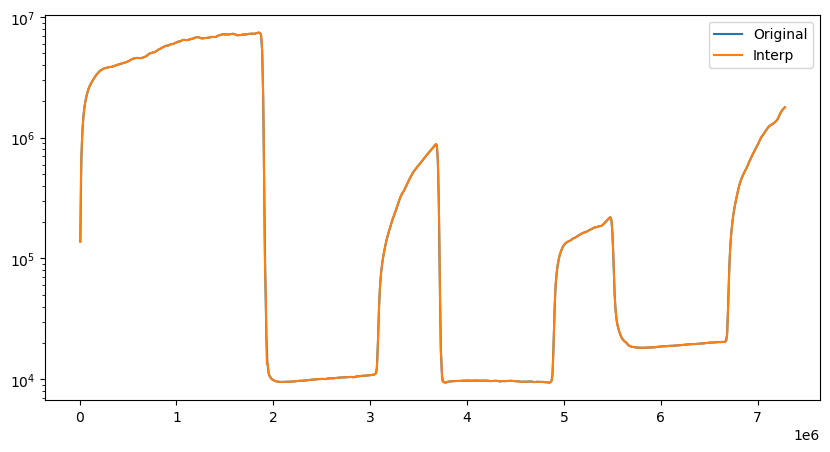

In [62]:
curr_sensor = sensor_data["day3"]["mat1"][0]
heater = curr_sensor[0]
gas_data = heater["Filtered"].values
time = heater["Time Since PowerOn"].values
interpolation_func = UnivariateSpline(time, gas_data)
interpolation_func.set_smoothing_factor(0.5)
interpolated_time = np.linspace(time[0], time[-1], len(time) * 2)
interpolated_data = interpolation_func(interpolated_time)

plt.figure(figsize=(10, 5))
plt.plot(time, gas_data, label="Original")
plt.plot(interpolated_time, interpolated_data, label="Interp")
plt.yscale("log")
plt.legend()
plt.show()

In [64]:
interpolation_funcs = {}
for day in range(1, 4):
    interpolation_funcs[f"day{day}"] = {}
    for mat in range(1, 3):
        interpolation_funcs[f"day{day}"][f"mat{mat}"] = {}
        for sensor in range(8):
            interpolation_funcs[f"day{day}"][f"mat{mat}"][sensor] = {}
            for heater in range(10):
                heater_step = sensor_data[f"day{
                    day}"][f"mat{mat}"][sensor][heater]
                filtered = heater_step["Filtered"].values
                time = heater_step["Time Since PowerOn"].values
                interpolation_func = UnivariateSpline(time, filtered)
                interpolation_funcs[f"day{day}"][f"mat{
                    mat}"][sensor][heater] = interpolation_func

In [71]:
with open("interpolation_functions.pkl", "rb") as f:
    interp_funcs = pickle.load(f)

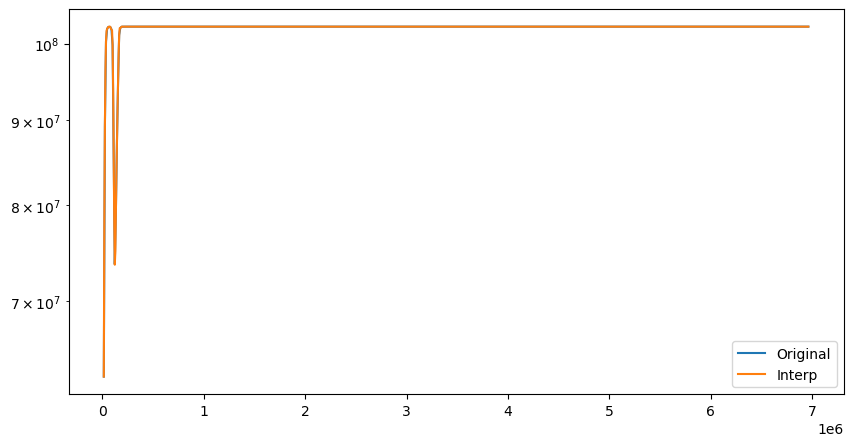

In [73]:
day = "day1"
mat = "mat1"
sensor = 0
heater_step = 3
heater = sensor_data[day][mat][sensor][heater_step]
gas_data = heater["Filtered"].values
time = heater["Time Since PowerOn"].values
interpolation_func = interp_funcs[day][mat][sensor][heater_step]
interpolated_time = np.linspace(time[0], time[-1], len(time) * 2)
interpolated_data = interpolation_func(interpolated_time)

plt.figure(figsize=(10, 5))
plt.plot(time, gas_data, label="Original")
plt.plot(interpolated_time, interpolated_data, label="Interp")
plt.yscale("log")
plt.legend()
plt.show()

In [70]:
with open("interpolation_functions.pkl", "wb") as f:
    pickle.dump(interpolation_funcs, f)